In [2]:
import pandas as pd

In [4]:
df = pd.read_excel('/Users/rheageorge/Downloads/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Initial Data Load & Exploration
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [16]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create new feature: TotalPrice
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [20]:
if 'Total Price' in df.columns:
    df.drop(columns=['Total Price'], inplace=True)

In [22]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [28]:
#Feature Engineering

df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['DayName'] = df['InvoiceDate'].dt.day_name()

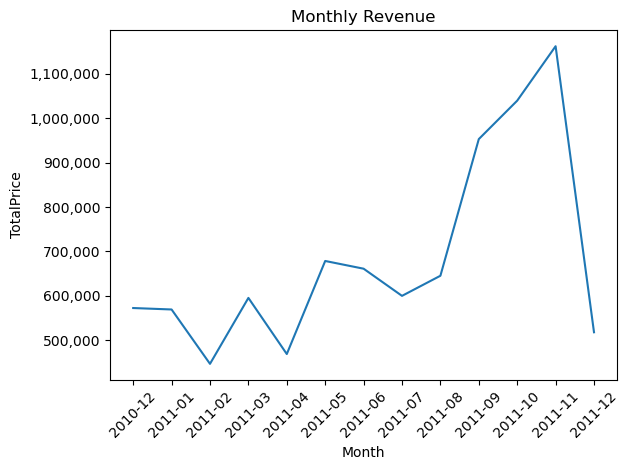

In [34]:
# Group total sales by month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Sort by month
monthly_sales = monthly_sales.sort_values('Month')

# Plot
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice')
plt.title("Monthly Revenue")
plt.xticks(rotation=45)

# Format y-axis labels (no scientific notation)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

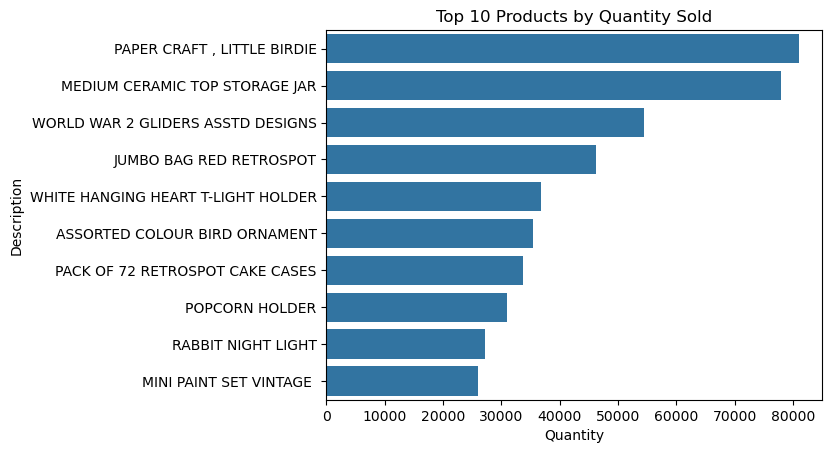

In [36]:
#Top Selling Product

top_products = df.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

sns.barplot(data=top_products, y='Description', x='Quantity')
plt.title("Top 10 Products by Quantity Sold")
plt.show()


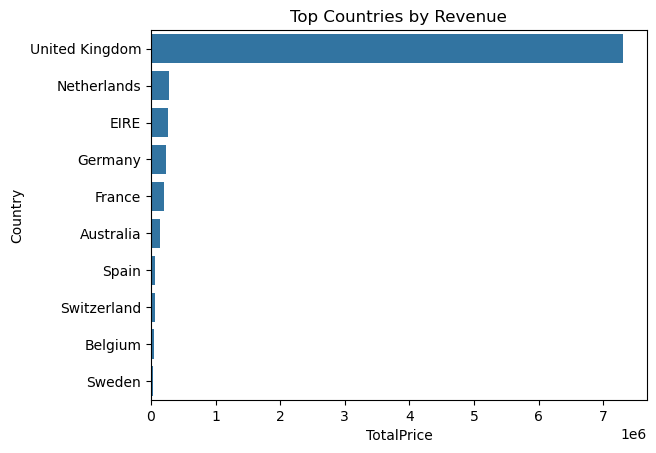

In [38]:
#Sales by Country

top_countries = df.groupby('Country')['TotalPrice'].sum().nlargest(10).reset_index()

sns.barplot(data=top_countries, x='TotalPrice', y='Country')
plt.title("Top Countries by Revenue")
plt.show()

In [40]:
#7. RFM Analysis (Recency, Frequency, Monetary)

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


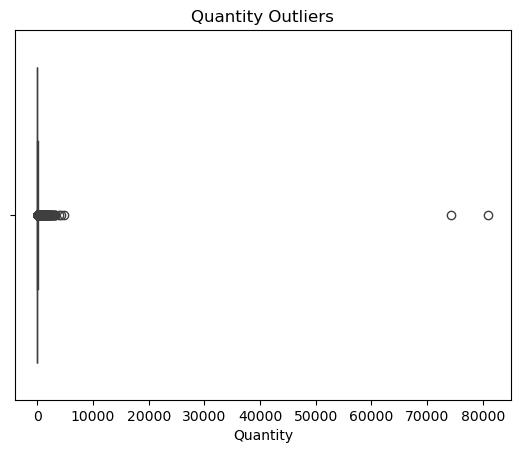

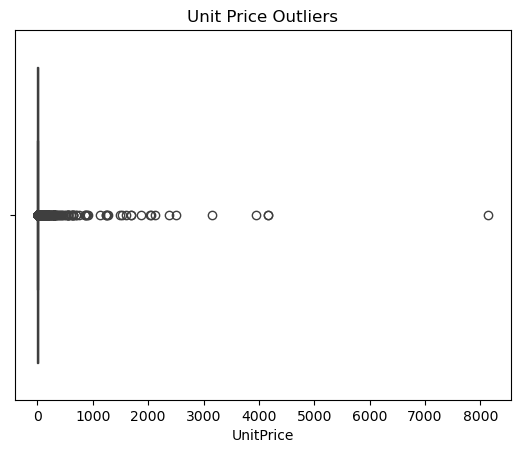

In [42]:
#Outlier Detection with Boxplots
sns.boxplot(x=df['Quantity'])
plt.title('Quantity Outliers')
plt.show()

sns.boxplot(x=df['UnitPrice'])
plt.title('Unit Price Outliers')
plt.show()

In [44]:
#Peak Sales Month

# Extract month and year
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

# Total sales per month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False)

# Display top 3 months
print("Top Months by Revenue:")
print(monthly_sales.head(3))


Top Months by Revenue:
Month
2011-11    1161817.380
2011-10    1039318.790
2011-09     952838.382
Name: TotalPrice, dtype: float64


In [46]:
#Best Selling Product

top_product = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(1)
print("Top-Selling Product:")
print(top_product)

Top-Selling Product:
Description
PAPER CRAFT , LITTLE BIRDIE    80995
Name: Quantity, dtype: int64
